In [284]:
import pandas as pd
import seaborn as sns
# Merge HTS  and PMTCT data

hts_df = pd.read_csv('./clean_data/clean_hts.csv')
pmtct_df = pd.read_csv('./clean_data/merged_pmtct.csv')

# hts_merged = pd.concat([hts_migori, hts_kakamega], ignore_index=True)
hts_df.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,period,dhis2_value,datim_value,gender,age
0,aCOEeeYEcsO,Rabondo Dispensary,14019,West sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,2019Q4,33,87.0,(F),20-24
1,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,2019Q4,15,53.0,(F),20-24
2,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,pkShOkgNQt2,2020Q2,9,10.0,(M),20-24
3,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,YXJf27jfkvS,2019Q4,7,39.0,(F),15-19
4,B8Y8xuk4MFf,Ngo'nga Dispensary,17052,South sakwa Ward,Awendo Sub County,Migori County,gMICOUtzqRb,2019Q4,3,5.0,(F),10-14


In [239]:
hts_df = hts_df.groupby(['facilityuid', 'period']).agg({'dhis2_value': 'sum', 'datim_value': 'sum'})

hts_df

dhis2_value  datim_value
facilityuid period                          
AKCk8JAY0dK 2019Q4          168        200.0
            2020Q1          234        280.0
            2020Q2          101        149.0
AbSJUr5oge2 2019Q4          322        541.0
            2020Q1          415        683.0
...                         ...          ...
zvicDsjeRbr 2020Q1           32         44.0
            2020Q2           21         52.0
zwV7ekHDAwe 2019Q4          739        890.0
            2020Q1          455        510.0
            2020Q2          396        333.0

[858 rows x 2 columns]

In [240]:
hts_df = hts_df.reset_index()
hts_df

,facilityuid,period,dhis2_value,datim_value
0,AKCk8JAY0dK,2019Q4,168,200.0
1,AKCk8JAY0dK,2020Q1,234,280.0
2,AKCk8JAY0dK,2020Q2,101,149.0
3,AbSJUr5oge2,2019Q4,322,541.0
4,AbSJUr5oge2,2020Q1,415,683.0
...,...,...,...,...
853,zvicDsjeRbr,2020Q1,32,44.0
854,zvicDsjeRbr,2020Q2,21,52.0
855,zwV7ekHDAwe,2019Q4,739,890.0
856,zwV7ekHDAwe,2020Q1,455,510.0


In [241]:
hts_df = hts_df.rename(columns={'dhis2_value': 'total_dhis2_value_hts', 'datim_value': 'total_datim_value_hts'})
hts_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts
0,AKCk8JAY0dK,2019Q4,168,200.0
1,AKCk8JAY0dK,2020Q1,234,280.0
2,AKCk8JAY0dK,2020Q2,101,149.0
3,AbSJUr5oge2,2019Q4,322,541.0
4,AbSJUr5oge2,2020Q1,415,683.0
...,...,...,...,...
853,zvicDsjeRbr,2020Q1,32,44.0
854,zvicDsjeRbr,2020Q2,21,52.0
855,zwV7ekHDAwe,2019Q4,739,890.0
856,zwV7ekHDAwe,2020Q1,455,510.0


In [242]:
hts_df['difference_hts'] = hts_df['total_dhis2_value_hts'] - hts_df['total_datim_value_hts']
hts_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0
...,...,...,...,...,...
853,zvicDsjeRbr,2020Q1,32,44.0,-12.0
854,zvicDsjeRbr,2020Q2,21,52.0,-31.0
855,zwV7ekHDAwe,2019Q4,739,890.0,-151.0
856,zwV7ekHDAwe,2020Q1,455,510.0,-55.0


In [243]:
hts_df['percentage_difference_hts'] = abs(hts_df['difference_hts'] / hts_df['total_datim_value_hts'] * 100)
hts_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0,16.000000
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0,16.428571
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653
...,...,...,...,...,...,...
853,zvicDsjeRbr,2020Q1,32,44.0,-12.0,27.272727
854,zvicDsjeRbr,2020Q2,21,52.0,-31.0,59.615385
855,zwV7ekHDAwe,2019Q4,739,890.0,-151.0,16.966292
856,zwV7ekHDAwe,2020Q1,455,510.0,-55.0,10.784314


# PMTCT

In [244]:
# hts_merged = pd.concat([hts_migori, hts_kakamega], ignore_index=True)
pmtct_df.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicator_name,period,dhis2_value,datim_value
0,SZnkrFoimi2,Kugitimo Health Centre,13723.0,Nyabasi east Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,64.0,64.0
1,xt2lltkTLza,Ntimaru Sub-District Hospital,13858.0,Ntimaru west Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2019Q4,119.0,124.0
2,NoZjHcIDHGW,Kegonga District Hospital,13663.0,Nyabasi east Ward,Kuria East Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q2,1.0,1.0
3,SZnkrFoimi2,Kugitimo Health Centre,13723.0,Nyabasi east Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q2,46.0,45.0
4,xt2lltkTLza,Ntimaru Sub-District Hospital,13858.0,Ntimaru west Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,194.0,191.0


In [245]:
pmtct_df = pmtct_df.groupby(['facilityuid', 'period']).agg({'dhis2_value': 'sum', 'datim_value': 'sum'})

pmtct_df

dhis2_value  datim_value
facilityuid period                          
AKCk8JAY0dK 2019Q4         31.0         31.0
            2020Q1         46.0         46.0
            2020Q2         49.0         49.0
AbSJUr5oge2 2019Q4        217.0        213.0
            2020Q1        272.0        267.0
...                         ...          ...
zvicDsjeRbr 2020Q1         20.0         20.0
            2020Q2         31.0         29.0
zwV7ekHDAwe 2019Q4         66.0         66.0
            2020Q1         93.0         85.0
            2020Q2         57.0         56.0

[821 rows x 2 columns]

In [246]:
pmtct_df = pmtct_df.reset_index()
pmtct_df

,facilityuid,period,dhis2_value,datim_value
0,AKCk8JAY0dK,2019Q4,31.0,31.0
1,AKCk8JAY0dK,2020Q1,46.0,46.0
2,AKCk8JAY0dK,2020Q2,49.0,49.0
3,AbSJUr5oge2,2019Q4,217.0,213.0
4,AbSJUr5oge2,2020Q1,272.0,267.0
...,...,...,...,...
816,zvicDsjeRbr,2020Q1,20.0,20.0
817,zvicDsjeRbr,2020Q2,31.0,29.0
818,zwV7ekHDAwe,2019Q4,66.0,66.0
819,zwV7ekHDAwe,2020Q1,93.0,85.0


In [247]:
pmtct_df = pmtct_df.rename(columns={'dhis2_value': 'total_dhis2_value_pmtct', 'datim_value': 'total_datim_value_pmtct'})
pmtct_df

,facilityuid,period,total_dhis2_value_pmtct,total_datim_value_pmtct
0,AKCk8JAY0dK,2019Q4,31.0,31.0
1,AKCk8JAY0dK,2020Q1,46.0,46.0
2,AKCk8JAY0dK,2020Q2,49.0,49.0
3,AbSJUr5oge2,2019Q4,217.0,213.0
4,AbSJUr5oge2,2020Q1,272.0,267.0
...,...,...,...,...
816,zvicDsjeRbr,2020Q1,20.0,20.0
817,zvicDsjeRbr,2020Q2,31.0,29.0
818,zwV7ekHDAwe,2019Q4,66.0,66.0
819,zwV7ekHDAwe,2020Q1,93.0,85.0


In [248]:
pmtct_df['difference_pmtct'] = pmtct_df['total_dhis2_value_pmtct'] - pmtct_df['total_datim_value_pmtct']
pmtct_df

,facilityuid,period,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct
0,AKCk8JAY0dK,2019Q4,31.0,31.0,0.0
1,AKCk8JAY0dK,2020Q1,46.0,46.0,0.0
2,AKCk8JAY0dK,2020Q2,49.0,49.0,0.0
3,AbSJUr5oge2,2019Q4,217.0,213.0,4.0
4,AbSJUr5oge2,2020Q1,272.0,267.0,5.0
...,...,...,...,...,...
816,zvicDsjeRbr,2020Q1,20.0,20.0,0.0
817,zvicDsjeRbr,2020Q2,31.0,29.0,2.0
818,zwV7ekHDAwe,2019Q4,66.0,66.0,0.0
819,zwV7ekHDAwe,2020Q1,93.0,85.0,8.0


In [249]:
pmtct_df['percentage_difference_pmtct'] = abs(pmtct_df['difference_pmtct'] / pmtct_df['total_datim_value_pmtct'] * 100)
pmtct_df

,facilityuid,period,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct
0,AKCk8JAY0dK,2019Q4,31.0,31.0,0.0,0.000000
1,AKCk8JAY0dK,2020Q1,46.0,46.0,0.0,0.000000
2,AKCk8JAY0dK,2020Q2,49.0,49.0,0.0,0.000000
3,AbSJUr5oge2,2019Q4,217.0,213.0,4.0,1.877934
4,AbSJUr5oge2,2020Q1,272.0,267.0,5.0,1.872659
...,...,...,...,...,...,...
816,zvicDsjeRbr,2020Q1,20.0,20.0,0.0,0.000000
817,zvicDsjeRbr,2020Q2,31.0,29.0,2.0,6.896552
818,zwV7ekHDAwe,2019Q4,66.0,66.0,0.0,0.000000
819,zwV7ekHDAwe,2020Q1,93.0,85.0,8.0,9.411765


# Merge PMTCT and HTS

In [250]:
merged_df = pd.merge(hts_df, pmtct_df, on=["facilityuid","period"])
merged_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659
...,...,...,...,...,...,...,...,...,...,...
816,zvicDsjeRbr,2020Q1,32,44.0,-12.0,27.272727,20.0,20.0,0.0,0.000000
817,zvicDsjeRbr,2020Q2,21,52.0,-31.0,59.615385,31.0,29.0,2.0,6.896552
818,zwV7ekHDAwe,2019Q4,739,890.0,-151.0,16.966292,66.0,66.0,0.0,0.000000
819,zwV7ekHDAwe,2020Q1,455,510.0,-55.0,10.784314,93.0,85.0,8.0,9.411765


In [251]:
# calculate mean
cutoff = merged_df["percentage_difference_hts"].median()
print(cutoff)
z = merged_df[merged_df['percentage_difference_hts'] > cutoff]
z

28.64864864864865


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000
...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000


In [252]:
len(merged_df) - len(z)

411

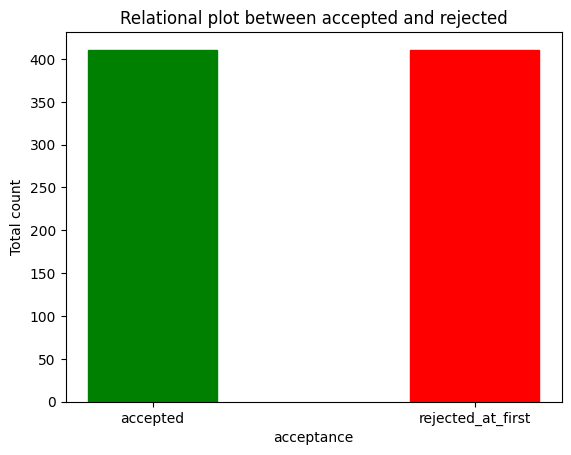

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
data = {"accepted": (len(merged_df) - len(z)),
        "rejected_at_first": len(z)}

x_data = list(data.keys())
y_data = list(data.values())


bar = plt.bar(x_data, y_data, color ='maroon',
        width = 0.4)
bar[0].set_color('g')
bar[1].set_color('r')
plt.xlabel("acceptance")
plt.ylabel("Total count")
plt.title("Relational plot between accepted and rejected")
plt.show()

From the bar plot above we know that there's a problem with the presented data. If values in the percentage_difference column are above cutoff which is defined by the median value, an assumption is made that the facilities did not submit their PMTCT results. We add the PMTCT results to the respective columns.

In [254]:
# define a lambda function with if-else conditions
merged_df['accept'] = merged_df['percentage_difference_hts'].apply(lambda x: 'yes' if x < cutoff else 'no')
merged_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,yes
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,yes
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,no
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,no
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,no
...,...,...,...,...,...,...,...,...,...,...,...
816,zvicDsjeRbr,2020Q1,32,44.0,-12.0,27.272727,20.0,20.0,0.0,0.000000,yes
817,zvicDsjeRbr,2020Q2,21,52.0,-31.0,59.615385,31.0,29.0,2.0,6.896552,no
818,zwV7ekHDAwe,2019Q4,739,890.0,-151.0,16.966292,66.0,66.0,0.0,0.000000,yes
819,zwV7ekHDAwe,2020Q1,455,510.0,-55.0,10.784314,93.0,85.0,8.0,9.411765,yes


In [255]:
len(merged_df[merged_df['accept'] == 'no'])


411

In [256]:
rejected = merged_df[merged_df['accept'] == 'no']
rejected

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,no
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,no
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,no
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583,no
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no
...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,no
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,no
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,no
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,no


In [257]:

if (rejected['difference_hts'] < 0).any():
    rejected['new_difference'] = rejected['total_dhis2_value_pmtct'] + rejected['difference_hts']
else:
    rejected['new_difference'] = rejected['total_datim_value_pmtct'] + rejected['difference_hts']

rejected

C:\Users\bowen\AppData\Local\Temp\ipykernel_13684\1809374107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept,new_difference
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,no,1.0
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,no,-2.0
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,no,4.0
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583,no,1.0
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no,-142.0
...,...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,no,0.0
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,no,0.0
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,no,1.0
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,no,2.0


In [258]:
rejected['new_percentage_difference']= abs(rejected['new_difference']/ rejected['total_datim_value_hts']* 100)
rejected

C:\Users\bowen\AppData\Local\Temp\ipykernel_13684\3065173262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept,new_difference,new_percentage_difference
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,no,1.0,0.671141
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,no,-2.0,0.369686
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,no,4.0,0.585652
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583,no,1.0,0.207039
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no,-142.0,29.158111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,no,0.0,0.000000
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,no,0.0,0.000000
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,no,1.0,0.751880
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,no,2.0,2.777778


In [259]:
new_cutoff = rejected["new_percentage_difference"].mean()
print(new_cutoff)
b = rejected[rejected['new_percentage_difference'] > new_cutoff]
b

11.48350861783755


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept,new_difference,new_percentage_difference
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no,-142.0,29.158111
15,BSIVRetkq9o,2019Q4,202,295.0,-93.0,31.525424,48.0,50.0,-2.0,4.000000,no,-45.0,15.254237
16,BSIVRetkq9o,2020Q1,191,293.0,-102.0,34.812287,59.0,58.0,1.0,1.724138,no,-43.0,14.675768
62,Dp9uga9zfqH,2019Q4,1298,1893.0,-595.0,31.431590,106.0,109.0,-3.0,2.752294,no,-489.0,25.832013
63,Dp9uga9zfqH,2020Q1,794,1179.0,-385.0,32.654792,121.0,119.0,2.0,1.680672,no,-264.0,22.391858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,xaQ9Z2jrxRM,2019Q4,1125,402.0,723.0,179.850746,45.0,43.0,2.0,4.651163,no,768.0,191.044776
781,xaQ9Z2jrxRM,2020Q1,1091,305.0,786.0,257.704918,71.0,71.0,0.0,0.000000,no,857.0,280.983607
782,xaQ9Z2jrxRM,2020Q2,333,225.0,108.0,48.000000,58.0,57.0,1.0,1.754386,no,166.0,73.777778
783,xt2lltkTLza,2019Q4,414,1029.0,-615.0,59.766764,121.0,125.0,-4.0,3.200000,no,-494.0,48.007775


In [260]:
# define a lambda function with if-else conditions
rejected['new_accept'] = rejected['new_percentage_difference'].apply(lambda x: 'yes' if x < new_cutoff else 'no')
rejected

C:\Users\bowen\AppData\Local\Temp\ipykernel_13684\241405633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept,new_difference,new_percentage_difference,new_accept
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,no,1.0,0.671141,yes
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,no,-2.0,0.369686,yes
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,no,4.0,0.585652,yes
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583,no,1.0,0.207039,yes
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no,-142.0,29.158111,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,no,0.0,0.000000,yes
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,no,0.0,0.000000,yes
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,no,1.0,0.751880,yes
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,no,2.0,2.777778,yes


In [261]:
rejected['accept'] = rejected['new_accept']
rejected

C:\Users\bowen\AppData\Local\Temp\ipykernel_13684\3703681518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept,new_difference,new_percentage_difference,new_accept
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,yes,1.0,0.671141,yes
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,yes,-2.0,0.369686,yes
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,yes,4.0,0.585652,yes
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583,yes,1.0,0.207039,yes
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no,-142.0,29.158111,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,yes,0.0,0.000000,yes
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,yes,0.0,0.000000,yes
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,yes,1.0,0.751880,yes
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,yes,2.0,2.777778,yes


In [262]:
merged_df = merged_df[merged_df['accept'] != 'no'].copy()
merged_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,yes
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,yes
7,B8Y8xuk4MFf,2020Q1,144,192.0,-48.0,25.000000,44.0,43.0,1.0,2.325581,yes
9,BEjIOW8DUVY,2019Q4,81,104.0,-23.0,22.115385,23.0,23.0,0.0,0.000000,yes
17,BSIVRetkq9o,2020Q2,136,186.0,-50.0,26.881720,58.0,56.0,2.0,3.571429,yes
...,...,...,...,...,...,...,...,...,...,...,...
810,zjvUyYZscbf,2020Q1,97,131.0,-34.0,25.954198,36.0,34.0,2.0,5.882353,yes
816,zvicDsjeRbr,2020Q1,32,44.0,-12.0,27.272727,20.0,20.0,0.0,0.000000,yes
818,zwV7ekHDAwe,2019Q4,739,890.0,-151.0,16.966292,66.0,66.0,0.0,0.000000,yes
819,zwV7ekHDAwe,2020Q1,455,510.0,-55.0,10.784314,93.0,85.0,8.0,9.411765,yes


In [263]:
rejected.drop(['new_difference','new_percentage_difference', 'new_accept'], axis=1, inplace=True)
rejected

C:\Users\bowen\AppData\Local\Temp\ipykernel_13684\1228230554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
2,AKCk8JAY0dK,2020Q2,101,149.0,-48.0,32.214765,49.0,49.0,0.0,0.000000,yes
3,AbSJUr5oge2,2019Q4,322,541.0,-219.0,40.480591,217.0,213.0,4.0,1.877934,yes
4,AbSJUr5oge2,2020Q1,415,683.0,-268.0,39.238653,272.0,267.0,5.0,1.872659,yes
5,AbSJUr5oge2,2020Q2,255,483.0,-228.0,47.204969,229.0,223.0,6.0,2.690583,yes
6,B8Y8xuk4MFf,2019Q4,303,487.0,-184.0,37.782341,42.0,40.0,2.0,5.000000,no
...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,yes
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,yes
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,yes
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,yes


In [264]:
final_merge = pd.concat([merged_df, rejected], axis=0)
final_merge

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,yes
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,yes
7,B8Y8xuk4MFf,2020Q1,144,192.0,-48.0,25.000000,44.0,43.0,1.0,2.325581,yes
9,BEjIOW8DUVY,2019Q4,81,104.0,-23.0,22.115385,23.0,23.0,0.0,0.000000,yes
17,BSIVRetkq9o,2020Q2,136,186.0,-50.0,26.881720,58.0,56.0,2.0,3.571429,yes
...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,2019Q4,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,yes
813,zsswqbRZEzQ,2020Q1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,yes
814,zsswqbRZEzQ,2020Q2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,yes
815,zvicDsjeRbr,2019Q4,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,yes


In [275]:
total_rejected = len(final_merge[final_merge['accept'] == 'no'])
len(final_merge)
total_accepted = len(final_merge[final_merge['accept'] == 'yes'])

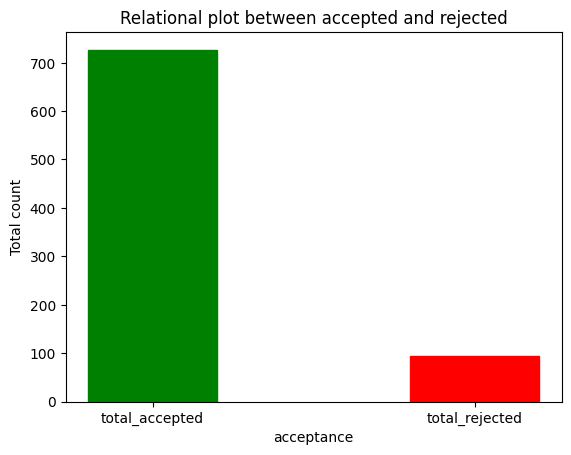

In [278]:
new_data = {"total_accepted": total_accepted,
        "total_rejected": total_rejected}

x_data = list(new_data.keys())
y_data = list(new_data.values())


bar2 = plt.bar(x_data, y_data, color ='maroon',
        width = 0.4)
bar2[0].set_color('g')
bar2[1].set_color('r')
plt.xlabel("acceptance")
plt.ylabel("Total count")
plt.title("Relational plot between accepted and rejected")
plt.show()

In [194]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 817
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   facilityuid                  821 non-null    object 
 1   period                       821 non-null    object 
 2   total_dhis2_value_hts        821 non-null    int64  
 3   total_datim_value_hts        821 non-null    float64
 4   difference_hts               821 non-null    float64
 5   percentage_difference_hts    821 non-null    float64
 6   total_dhis2_value_pmtct      821 non-null    float64
 7   total_datim_value_pmtct      821 non-null    float64
 8   difference_pmtct             821 non-null    float64
 9   percentage_difference_pmtct  821 non-null    float64
 10  accept                       821 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 77.0+ KB


# Creating the binary classification model

In [195]:
from sklearn import linear_model, model_selection, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [196]:
final_merge['period'].unique()

array(['2019Q4', '2020Q1', '2020Q2'], dtype=object)

In [197]:
#converting categorical data to numerical data
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
final_merge['accept'] = label_encoder.fit_transform(final_merge['accept'])
final_merge['period'] = label_encoder.fit_transform(final_merge['period'])
final_merge

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,0,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,1
1,AKCk8JAY0dK,1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,1
7,B8Y8xuk4MFf,1,144,192.0,-48.0,25.000000,44.0,43.0,1.0,2.325581,1
9,BEjIOW8DUVY,0,81,104.0,-23.0,22.115385,23.0,23.0,0.0,0.000000,1
17,BSIVRetkq9o,2,136,186.0,-50.0,26.881720,58.0,56.0,2.0,3.571429,1
...,...,...,...,...,...,...,...,...,...,...,...
812,zsswqbRZEzQ,0,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,1
813,zsswqbRZEzQ,1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,1
814,zsswqbRZEzQ,2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,1
815,zvicDsjeRbr,0,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,1


In [198]:
final_merge['period'].unique()

array([0, 1, 2])

In [199]:
final_merge.reset_index(drop=True, inplace=True)
final_merge

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,0,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,1
1,AKCk8JAY0dK,1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,1
2,B8Y8xuk4MFf,1,144,192.0,-48.0,25.000000,44.0,43.0,1.0,2.325581,1
3,BEjIOW8DUVY,0,81,104.0,-23.0,22.115385,23.0,23.0,0.0,0.000000,1
4,BSIVRetkq9o,2,136,186.0,-50.0,26.881720,58.0,56.0,2.0,3.571429,1
...,...,...,...,...,...,...,...,...,...,...,...
816,zsswqbRZEzQ,0,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,1
817,zsswqbRZEzQ,1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,1
818,zsswqbRZEzQ,2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,1
819,zvicDsjeRbr,0,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,1


In [200]:
#converting facilityuid to index values
final_merge.rename(columns={'index': 'facilityuid'}, inplace=True)
final_merge

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,0,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,1
1,AKCk8JAY0dK,1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,1
2,B8Y8xuk4MFf,1,144,192.0,-48.0,25.000000,44.0,43.0,1.0,2.325581,1
3,BEjIOW8DUVY,0,81,104.0,-23.0,22.115385,23.0,23.0,0.0,0.000000,1
4,BSIVRetkq9o,2,136,186.0,-50.0,26.881720,58.0,56.0,2.0,3.571429,1
...,...,...,...,...,...,...,...,...,...,...,...
816,zsswqbRZEzQ,0,108,165.0,-57.0,34.545455,57.0,57.0,0.0,0.000000,1
817,zsswqbRZEzQ,1,106,192.0,-86.0,44.791667,86.0,85.0,1.0,1.176471,1
818,zsswqbRZEzQ,2,62,133.0,-71.0,53.383459,72.0,71.0,1.0,1.408451,1
819,zvicDsjeRbr,0,51,72.0,-21.0,29.166667,23.0,23.0,0.0,0.000000,1


In [201]:
#selecting dependent and independent variables
y= final_merge['accept']

#Remove columns we are not interested in
final_merge.drop(['facilityuid', 'difference_pmtct','difference_hts', 'percentage_difference_pmtct', 'accept'], axis=1, inplace=True)

#Saving the rest of the data as input data
X = final_merge

In [202]:
len(X)

821

In [203]:
X.columns

Index(['period', 'total_dhis2_value_hts', 'total_datim_value_hts',
       'percentage_difference_hts', 'total_dhis2_value_pmtct',
       'total_datim_value_pmtct'],
      dtype='object')

In [204]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [205]:
#Create a Decision Tree Classifier
tree_model= DecisionTreeClassifier(random_state=0, max_depth=5)

In [206]:
#Splitting dataset

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=99)

In [207]:
len(X_train)
X_test

,period,total_dhis2_value_hts,total_datim_value_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct
384,0,102,132.0,22.727273,29.0,28.0
699,0,169,333.0,49.249249,177.0,173.0
199,1,193,259.0,25.482625,39.0,39.0
494,1,142,236.0,39.830508,59.0,58.0
624,1,114,218.0,47.706422,110.0,106.0
...,...,...,...,...,...,...
174,0,482,496.0,2.822581,31.0,31.0
455,1,42,77.0,45.454545,34.0,34.0
99,1,373,468.0,20.299145,75.0,71.0
263,0,890,947.0,6.019007,63.0,62.0


In [208]:
# set index
X_test

,period,total_dhis2_value_hts,total_datim_value_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct
384,0,102,132.0,22.727273,29.0,28.0
699,0,169,333.0,49.249249,177.0,173.0
199,1,193,259.0,25.482625,39.0,39.0
494,1,142,236.0,39.830508,59.0,58.0
624,1,114,218.0,47.706422,110.0,106.0
...,...,...,...,...,...,...
174,0,482,496.0,2.822581,31.0,31.0
455,1,42,77.0,45.454545,34.0,34.0
99,1,373,468.0,20.299145,75.0,71.0
263,0,890,947.0,6.019007,63.0,62.0


In [210]:
len(X_test)

165

In [211]:
#Fitting the model into training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

## Visualization

In [212]:
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_3 <= 30.07
|   |--- feature_3 <= 28.85
|   |   |--- class: 1
|   |--- feature_3 >  28.85
|   |   |--- feature_3 <= 28.87
|   |   |   |--- class: 0
|   |   |--- feature_3 >  28.87
|   |   |   |--- class: 1
|--- feature_3 >  30.07
|   |--- feature_1 <= 298.00
|   |   |--- feature_4 <= 40.50
|   |   |   |--- feature_2 <= 83.50
|   |   |   |   |--- feature_3 <= 53.54
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  53.54
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  83.50
|   |   |   |   |--- feature_3 <= 36.57
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  36.57
|   |   |   |   |   |--- class: 0
|   |   |--- feature_4 >  40.50
|   |   |   |--- feature_2 <= 231.50
|   |   |   |   |--- feature_3 <= 30.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  30.29
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  231.50
|   |   |   |   |--- feature_5 <= 75.50
|   |   |   |   |   |--- class: 0
|

In [213]:
# save file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

## Prediction

In [214]:
#Do predictions on test data
y_pred= tree_model.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1]


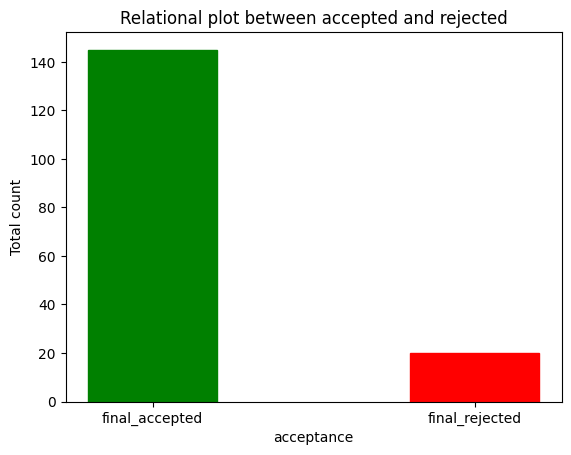

In [283]:
import numpy as np
total_pred_accepted = np.count_nonzero(y_pred==1)
total_pred_rejected = np.count_nonzero(y_pred==0)
total_pred_accepted

final_data = {"final_accepted": total_pred_accepted,
        "final_rejected": total_pred_rejected}

x_data = list(final_data.keys())
y_data = list(final_data.values())


bar = plt.bar(x_data, y_data, color ='maroon',
        width = 0.4)
bar[0].set_color('g')
bar[1].set_color('r')
plt.xlabel("acceptance")
plt.ylabel("Total count")
plt.title("Relational plot between accepted and rejected")
plt.show()

In [215]:
len(y_pred)

165

In [216]:
#Calculate accuracy
tree_model.score(X_test, y_test) * 100

95.15151515151516

In [217]:
#finding F1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9726027397260274

## Relationship between prediction and the test

In [53]:
preds = pd.DataFrame(y_pred, columns=['prediction'])
preds

,prediction
0,1
1,1
2,1
3,0
4,1
...,...
160,1
161,1
162,1
163,1


In [221]:
preds = preds.reset_index(drop=False)
preds

,index,prediction
0,0,1.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,1.0
...,...,...
160,160,1.0
161,161,1.0
162,162,1.0
163,163,1.0


In [63]:
preds["prediction"] = preds["prediction"].astype('float32')
preds

,prediction
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
160,1.0
161,1.0
162,1.0
163,1.0


In [64]:
X_test

,period,total_dhis2_value_hts,total_datim_value_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct
384,0,102,132.0,22.727273,29.0,28.0
699,0,169,333.0,49.249249,177.0,173.0
199,1,193,259.0,25.482625,39.0,39.0
494,1,142,236.0,39.830508,59.0,58.0
624,1,114,218.0,47.706422,110.0,106.0
...,...,...,...,...,...,...
174,0,482,496.0,2.822581,31.0,31.0
455,1,42,77.0,45.454545,34.0,34.0
99,1,373,468.0,20.299145,75.0,71.0
263,0,890,947.0,6.019007,63.0,62.0


In [222]:
merged_df

,facilityuid,period,total_dhis2_value_hts,total_datim_value_hts,difference_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,difference_pmtct,percentage_difference_pmtct,accept
0,AKCk8JAY0dK,2019Q4,168,200.0,-32.0,16.000000,31.0,31.0,0.0,0.000000,yes
1,AKCk8JAY0dK,2020Q1,234,280.0,-46.0,16.428571,46.0,46.0,0.0,0.000000,yes
7,B8Y8xuk4MFf,2020Q1,144,192.0,-48.0,25.000000,44.0,43.0,1.0,2.325581,yes
9,BEjIOW8DUVY,2019Q4,81,104.0,-23.0,22.115385,23.0,23.0,0.0,0.000000,yes
17,BSIVRetkq9o,2020Q2,136,186.0,-50.0,26.881720,58.0,56.0,2.0,3.571429,yes
...,...,...,...,...,...,...,...,...,...,...,...
810,zjvUyYZscbf,2020Q1,97,131.0,-34.0,25.954198,36.0,34.0,2.0,5.882353,yes
816,zvicDsjeRbr,2020Q1,32,44.0,-12.0,27.272727,20.0,20.0,0.0,0.000000,yes
818,zwV7ekHDAwe,2019Q4,739,890.0,-151.0,16.966292,66.0,66.0,0.0,0.000000,yes
819,zwV7ekHDAwe,2020Q1,455,510.0,-55.0,10.784314,93.0,85.0,8.0,9.411765,yes


In [224]:
df3 = pd.merge(X_test, merged_df, left_index=True, right_index=True)
# Print the result
df3

,period_x,total_dhis2_value_hts_x,total_datim_value_hts_x,percentage_difference_hts_x,total_dhis2_value_pmtct_x,total_datim_value_pmtct_x,facilityuid,period_y,total_dhis2_value_hts_y,total_datim_value_hts_y,difference_hts,percentage_difference_hts_y,total_dhis2_value_pmtct_y,total_datim_value_pmtct_y,difference_pmtct,percentage_difference_pmtct,accept
384,0,102,132.0,22.727273,29.0,28.0,WKpi4HTOfa6,2019Q4,127,176.0,-49.0,27.840909,50.0,50.0,0.0,0.000000,yes
699,0,169,333.0,49.249249,177.0,173.0,rGIiGfPUc5P,2020Q2,143,198.0,-55.0,27.777778,56.0,56.0,0.0,0.000000,yes
199,1,193,259.0,25.482625,39.0,39.0,LGgFPRuWpws,2020Q2,405,449.0,-44.0,9.799555,68.0,65.0,3.0,4.615385,yes
624,1,114,218.0,47.706422,110.0,106.0,leXuCmyYwWX,2020Q2,397,355.0,42.0,11.830986,47.0,45.0,2.0,4.444444,yes
22,2,205,204.0,0.490196,57.0,56.0,Bmhbkq3ILv5,2020Q2,62,85.0,-23.0,27.058824,25.0,25.0,0.0,0.000000,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2,299,259.0,15.444015,73.0,70.0,LYR8fhhFOaQ,2020Q2,151,172.0,-21.0,12.209302,32.0,29.0,3.0,10.344828,yes
403,2,217,292.0,25.684932,75.0,72.0,WnyXc5FYO5e,2020Q1,190,209.0,-19.0,9.090909,22.0,22.0,0.0,0.000000,yes
611,1,251,421.0,40.380048,176.0,175.0,kmEXAwkvnDQ,2020Q1,148,162.0,-14.0,8.641975,34.0,34.0,0.0,0.000000,yes
263,0,890,947.0,6.019007,63.0,62.0,OnMW8Kn4YDf,2019Q4,499,622.0,-123.0,19.774920,21.0,21.0,0.0,0.000000,yes


In [69]:
ex = X_test.copy()
ex = ex.reset_index()
ex["predics"] = preds["prediction"]
ex

,index,period,total_dhis2_value_hts,total_datim_value_hts,percentage_difference_hts,total_dhis2_value_pmtct,total_datim_value_pmtct,predics
0,384,0,102,132.0,22.727273,29.0,28.0,1.0
1,699,0,169,333.0,49.249249,177.0,173.0,1.0
2,199,1,193,259.0,25.482625,39.0,39.0,1.0
3,494,1,142,236.0,39.830508,59.0,58.0,0.0
4,624,1,114,218.0,47.706422,110.0,106.0,1.0
...,...,...,...,...,...,...,...,...
160,174,0,482,496.0,2.822581,31.0,31.0,1.0
161,455,1,42,77.0,45.454545,34.0,34.0,1.0
162,99,1,373,468.0,20.299145,75.0,71.0,1.0
163,263,0,890,947.0,6.019007,63.0,62.0,1.0
